<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/Python%202023/Caso_19_Distribuci%C3%B3n_Poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Calcular probabilidades, valor esperado y dispersión de ejercicios de distribucón *Poisson*.

# Descripción

- Se cargan librerías
- Se cargan funciones precodificadoas
- Se describen ejercicios relacionados con la distribución de probabilidad de *Poisson*
- De cada ejercicio se determina la tabla de distribución.
- De cada ejercicio se calculan probabilidades.
- De cada ejercicio se calcula valor esperado, variazna y desviación estándar.
- Se interpreta cada ejercicio
- Al final se interpreta el caso



# Fundamento teórico

Otra variable aleatoria discreta que tiene numerosas aplicaciones prácticas es la variable aleatoria de Poisson. Su distribución de probabilidad da un buen modelo para datos que representa el número de sucesos de un evento especificado en una unidad determinada de tiempo o espacio (Mendenhall, Beaver, and Beaver 2006).

Los experimentos que dan valores numéricos de una variable aleatoria X, el número de resultados que ocurren durante un intervalo dado o en una región específica, se llaman experimentos de Poisson.(Walpole, Myers, and Myers 2012)

Esta distribución discreta, suele usarse para estimar el número de veces que sucede un hecho determinado (ocurrencias) en un intervalo de tiempo o de espacio. Por ejemplo,

- La variable de interés va desde el número promedio de automóviles que llegan (llegadas) a un lavado de coches en una hora o

- El número medio de reparaciones necesarias en $10$ kms. de una autopista o,

- El número promedio de fugas de agua en tubería en un lapso $3$ meses.

- El número de focos promedio que fallan en una cantidad de lote de $1000$ focos.

- El número medio de fugas en $100$ kms.de tubería, entre otros (Anderson, Sweeney, and Williams 2008).

## Fórmula de probabilidad

$$
f(x) = \frac{{e^{ - \mu }\cdot \mu ^x }}{{x!}}
$$

en donde:

- $f(x)$ es la función de probabilidad para valores de $x=0,1,2,3..,n$
.

- $μ$ es el valor medio esperado en cierto lapso de tiempo. Algunas veces expresado como $λ$ lambda.

- $x$ es la variable aleatoria. Es una variable aleatoria discreta $(x=0,1,.2,...)$

- $e$ valor constante, es la base de los logaritmos naturales 2.71728
.

## Propiedades de un evento Poisson:

- La probabilidad de ocurrencia es la misma para cualquiera de dos intervalos de la misma longitud.

- La ocurrencia o no ocurrencia en cualquier intervalo es independiente de la ocurrencia o no ocurrencia en cualquier otro intervalo.

- El factor de proporcionalidad para la probabilidad de un hecho en un intervalo infinitésimo. Se le suele designar como parámetro de intensidad y corresponde con el número medio de hechos que cabe esperar que se produzcan en un intervalo unitario (media de la distribución);

- El valor de la media también coincide con la varianza de la distribución.

- Se trata de un modelo discreto y que el campo de variación de la variable será el conjunto de los número naturales, incluido el cero: $x∈{0, 1, 2, 3, 4 ..., ..., n}$

## Probabilidad acumulada
$$
F(x) =
\sum_{0}^{n}f.x_i
$$

La probabilidad acumulada debe ser $1$ o $100\%$.


## Valor medio o valor esperado $VE$

$$
E(X) =
\lambda
$$

## La varianza
$$
varianza = \sigma^{2} =
\lambda
$$
## La desviación estándar

$$
\sigma = \sqrt{Var(x)} =
\sqrt{\sigma^{2}}
$$

## Funciones en Python

En Python se puede utilizar la biblioteca *scipy.stats* para trabajar con la distribución de *Poisson*.

- Función para generar números aleatorios *poisson.rvs(mu=lambda, size= n)*
- Función para calcular probabilidad *poisson.rvs(mu=lambda, size= ?)*
- Función para generar números aleatorios *poisson.pmf(x, mu=lambda)*
- Función para probabilidad acumulada * poisson.cdf(x, mu=lambda)*




# Desarrollo



## Cargar librerías



In [1]:
# Se cargan librerías adecuadas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.special import comb # Para combinaciones

import pandas as pd

from IPython.display import display, HTML # Para ver HTML
import math as mt

## Cargar funciones

In [25]:
def f_prob_poisson(x, media):
  e = mt.exp(1)
  probabilidad = (media ** x) * (e ** (-media)) / mt.factorial(x)
  return probabilidad

def f_tabla_hyper (xi, media):
  # Calcular las probabilidades para cada valor de xi
  probabilidades = [poisson.pmf(x, mu=media) for x in xi]

  # Formatear las probabilidades con 6 decimales sin notación científica
  probabilidades = [f'{p:.6f}' for p in probabilidades]

  # Calcular las probabilidades acumuladas
  probabilidades_acumuladas = [poisson.cdf(x, mu=media) for x in xi]

  # Formatear las probabilidades con 6 decimales sin notación científica
  probabilidades_acumuladas = [f'{p:.6f}' for p in probabilidades_acumuladas]

  # Crear un DataFrame para la tabla de probabilidades
  tabla_probabilidades = pd.DataFrame({'x': xi, 'P(X = x)': probabilidades, 'P(X <= x)': probabilidades_acumuladas})

  # Mostrar la tabla de probabilidades
  #print(tabla_probabilidades)
  return (tabla_probabilidades)
def f_graficos_probabilidad_discreta(tabla):
    # Crear un DataFrame a partir de la tabla de probabilidad
    df = pd.DataFrame(tabla)

    # Gráfico de barras de probabilidad
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.bar(df.index, df['P(X = x)'], color='skyblue')
    plt.xticks(df.index, df['x'])  # Establecer etiquetas personalizadas en el eje x
    plt.xlabel('x')
    plt.ylabel('Probabilidad')
    plt.title('Gráfico de Barras de Probabilidad')

    # Gráfico lineal de probabilidad acumulada
    plt.subplot(1, 2, 2)
    plt.plot(df.index, df['P(X <= x)'], marker='o', color='green')
    plt.xticks(df.index, df['x'])  # Establecer etiquetas personalizadas en el eje x
    plt.xlabel('x')
    plt.ylabel('Probabilidad Acumulada')
    plt.title('Gráfico Lineal de Probabilidad Acumulada')

    plt.tight_layout()
    plt.show()

def f_graficos_probabilidad_discreta_VE_ds(tabla, VE, ds):
    # Crear un DataFrame a partir de la tabla de probabilidad
    df = pd.DataFrame(tabla)

    # Gráfico de barras de probabilidad
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.bar(df.index, df['P(X = x)'], color='skyblue')

    # El Valor esperado y desviación izq y der
    # Agregar una línea punteada
    plt.axvline(x=VE, color='red', linestyle='--', label='VE='+str(np.round(VE, 2)))
    plt.axvline(x=VE - ds, color='blue', linestyle='--', label='Desv. Std='+str(np.round(ds, 2)))
    plt.axvline(x=VE + ds, color='blue', linestyle='--')

    plt.xticks(df.index, df['x'])  # Establecer etiquetas personalizadas en el eje x
    plt.xlabel('x')
    plt.ylabel('Probabilidad')
    plt.title('Gráfico de Barras de Probabilidad con VE y Desv Std.')

    plt.tight_layout()
    plt.legend()
    plt.show()

## Ejercicio de llegadas de autos a un estacionamiento de un Banco

Se desea saber el número de llegadas, en un lapso de $15$ minutos, a la rampa del cajero automático de un banco (Anderson, Sweeney, and Williams 2008).

Si se puede suponer que la probabilidad de llegada de los automóviles es la misma en cualesquiera de dos lapsos de la misma duración y si la llegada o no llegada de un automóvil en cualquier lapso es independiente de la llegada o no llegada de un automóvil en cualquier otro lapso, se puede aplicar la función de probabilidad de Poisson.

Dichas condiciones se satisfacen y en un análisis de datos pasados encuentra que el número promedio de automóviles que llegan en un lapso de 15 minutos es igual a $media = \lambda = 10$;

La variable aleatoria es $x$ número de automóviles que llegan en un lapso de 15 minutos.

¿Cuál es la probabilidad de que lleguen exactamente 5, $f(x=5)$ automóviles en 15 minutos.

### Inicializando variables

In [3]:
xi = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # Puede variar
media = 10


### Probabilidad de que $f(x=5)$

Se ejecuta la función *f_prob_poisson()* previamente preparada para calcular una probabilidad especifica de acuerdo con la fórmula de probabilidad de *Poisson*.

In [4]:
x = 5
probabilidad = f_prob_poisson(x=x, media = media)
print ("La probabilidad de que llegan 5 autmóviles en un lapso de 15 minutos es de: ", np.round(probabilidad * 100, 2), "%")


La probabilidad de que llegan 5 autmóviles en un lapso de 15 minutos es de:  3.78 %


### Tabla de probabilidad

Se estima una llegada desde 0 a $media * 2 = 20$ ¿cuál es la probabilidad de 0 a 20?




In [5]:
n = media * 2
xi = [i for i in range(n+1)]
print(xi)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


### Construir tabla de probabilidad

Se manda llamar la función previamente codificada para construir la tabla de la distribución de *Poisson*.


In [47]:
tabla = f_tabla_hyper(xi, media)
# print(tabla)
tabla_html = tabla.to_html(index=False, classes='table table-bordered table-striped')

# Imprimir la tabla HTML
# Mostrar la tabla directamente
display(HTML(tabla_html))

x,P(X = x),P(X <= x)
0,0.000045,0.000045
1,0.000454,0.000499
2,0.002270,0.002769
3,0.007567,0.010336
4,0.018917,0.029253
5,0.037833,0.067086
6,0.063055,0.130141
7,0.090079,0.220221
8,0.112599,0.332820
9,0.125110,0.457930


### Visualizar probabilidad

Se manda llamar *f_graficos_probabilidad_discreta()*

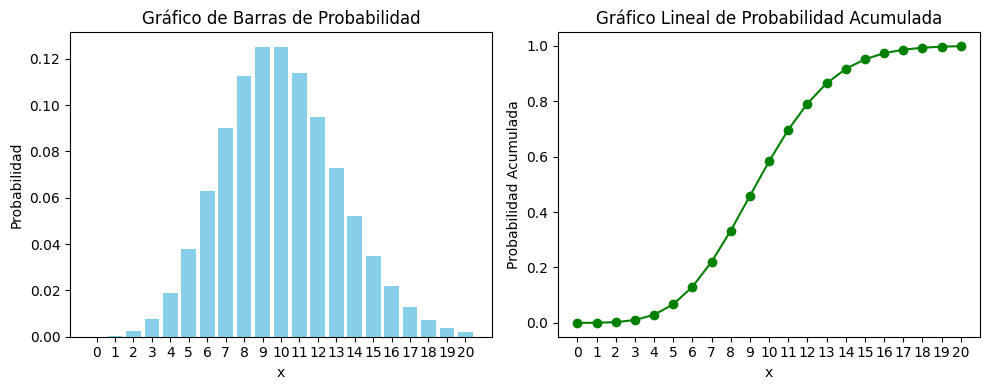

In [48]:
f_graficos_probabilidad_discreta(tabla)

### Valor esperado

Conforme a la fórmula:

In [49]:
VE = media
print ("El valor esperado VE es: ", np.round(VE, 4))

El valor esperado VE es:  10


### Varianza

Conforme a la fórmula

In [50]:
varianza = VE
print ("La varianza es: ", np.round(varianza, 4))

La varianza es:  10


### Desviación estándar

La raiz cuadrada de la varianza

In [51]:
desv_std = np.sqrt(varianza)
print ("La desviación estándar es: ", np.round(desv_std, 4))

La desviación estándar es:  3.1623


### Visualizar probabilidad con VE y desviación estándar



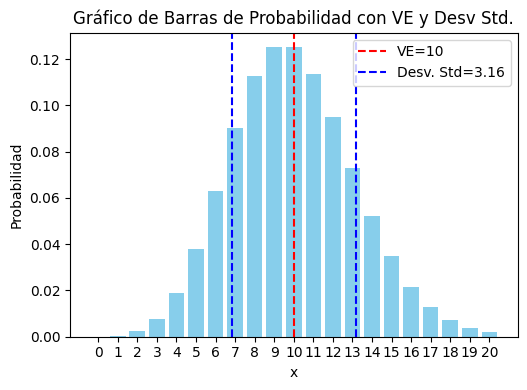

In [52]:
f_graficos_probabilidad_discreta_VE_ds(tabla, VE, desv_std)



## Accidentes en industria

En ciertas instalaciones industriales los accidentes ocurren con muy poca frecuencia. Se sabe que la probabilidad de un accidente en cualquier día dado es $0.005$ y los accidentes son independientes entre sí (Walpole, Myers, and Myers 2012).

¿Cuál es la probabilidad de que en cualquier periodo aproximado dado de $4$ meses $120$ días habrá un accidente en un día?



### Inicializar variables

Se multiplica la cantidad la de días por su probabilidad para encontrar la media del periodo de 4 meses. Esta media será el parámetro para la distribución Poisson.

In [21]:
dias = 120
prob_acc_por_dia = 0.005
media = dias * prob_acc_por_dia
print ("La media de accidentes por dia", media)

La media de accidentes por dia 0.6


### Crear tabla de distribución

Se construye tabla de probabilidad en cantidad de $x$ cantidad accidentes desde 0 a $n = 8$. Este valor puede variar a gusto del analista investigador.

In [22]:
n = 8 ## accidentes
xi = [i for i in range(n+1)]
print(xi)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [26]:
tabla = f_tabla_hyper(xi, media)
# print(tabla)
tabla_html = tabla.to_html(index=False, classes='table table-bordered table-striped')

# Imprimir la tabla HTML
# Mostrar la tabla directamente
display(HTML(tabla_html))

x,P(X = x),P(X <= x)
0,0.548812,0.548812
1,0.329287,0.878099
2,0.098786,0.976885
3,0.019757,0.996642
4,0.002964,0.999606
5,0.000356,0.999961
6,0.000036,0.999997
7,0.000003,1.000000
8,0.000000,1.000000


### Visualizar probababilidades


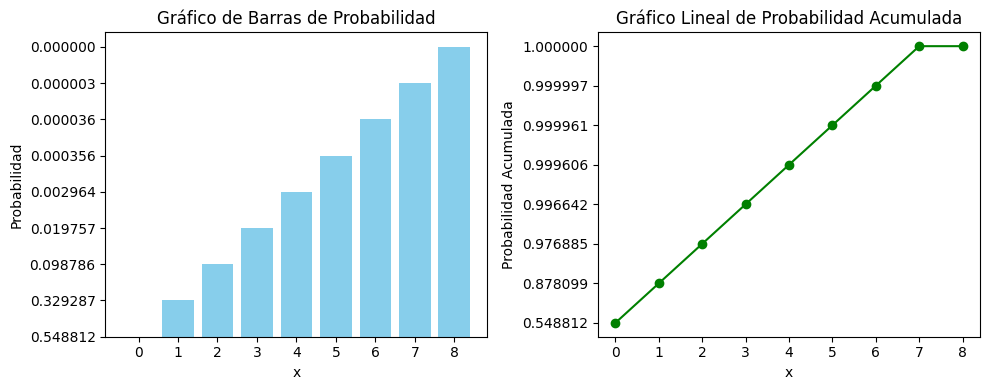

In [27]:
f_graficos_probabilidad_discreta(tabla)

### Valor esperado


In [29]:
VE = media
print ("El valor esperado VE es: ", np.round(VE, 4))

El valor esperado VE es:  0.6


### Varianza

In [30]:
varianza = VE
print ("La varianza es: ", np.round(varianza, 4))

La varianza es:  0.6


### Desviación estándar


In [31]:
desv_std = np.sqrt(varianza)
print ("La desviación estándar es: ", np.round(desv_std, 4))

La desviación estándar es:  0.7746


### Visualizar probabildiades con VE y Desv Std



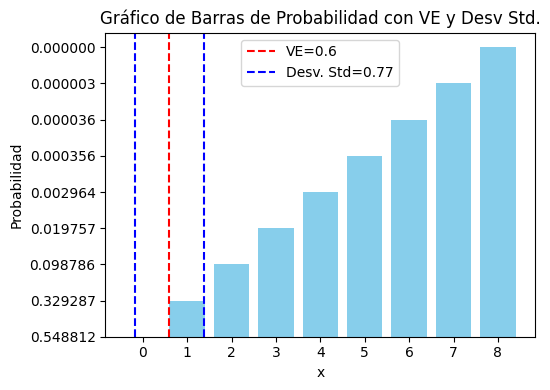

In [32]:
f_graficos_probabilidad_discreta_VE_ds(tabla, VE, desv_std)

# Interpretación del caso

- Del ejercicio de llegadas de autos a un banco en 15 minutos
  - ¿Cuál es la probabilidad de que lleguen 5 autos, $f(x=5)$?
  - Cúal es la probabilidad de que lleguen 15 autos, $f(x=15)$?
  - Cúal es la probabilidad de que lleguen de entre 8 y 12 automóviles, $f(8 \le x \le 12)$?
  - ¿Cuál es la probabilidad de que lleguen mas de 15 carros?, $F(x>15)$.
  - ¿Qué significado e interpretación tiene el conocer el valor esperado $VE$ y la variabilidad en términos de desviación estándar para el ejercicio de accidenes llegada de automóviles cada 15 minutos?

- Del ejercicio de accidentes por dia en la industria eléctrica
  - ¿Cuál es la probabilidad de sufrir $2$ accidentes por dia?, $f(x=2)$.
  - ¿Cuál es la probabilidad de sufrir $1$ a $2$ accidentes por dia?, $f(1 \le x \le 2)$.
  - ¿Se puede pensar que hay un riesgo alto de sufrir al menos $1$ accidente al dia, $f(x\ge2)$ si alto significa que la probabilidad sea mayor a $50\%$ accidentes por dia, ¿porqué?
  - ¿Qué significado e interpretación tiene el conocer el valor esperado $VE$ y la variabilidad en términos de desviación estándar para el ejercicio de accidenes por día?
  
  



# Bibliografía

- Anderson, David R., Dennis J. Sweeney, and Thomas A. Williams. 2008. Estadística Para Administración y Economía. 10th ed. Australia • Brasil • Corea • España • Estados Unidos • Japón • México • Reino Unido • Singapur: Cengage Learning,.

- Mendenhall, William, Robert J. Beaver, and Barbara M. Beaver. 2006. Introducción a La Probabilidad y Estadística. 13a Edición.

- Walpole, Ronald E., Raymond H. Myers, and Sharon L. Myers. 2012. Probabilidad y Estadística Para Ingeniería y Ciencias. Novena Edición. México: Pearson.